In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2

In [76]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 48
EPOCHS = 10

In [77]:
ROOT_PATH = os.getcwd()

In [78]:
TRAIN_PATH_angry = ROOT_PATH + "\\..\\data\\images\\train\\angry\\"
TRAIN_PATH_disgust = ROOT_PATH + "\\..\\data\\images\\train\\disgust\\"
TRAIN_PATH_fear = ROOT_PATH + "\\..\\data\\images\\train\\fear\\"
TRAIN_PATH_happy = ROOT_PATH + "\\..\\data\\images\\train\\happy\\"
TRAIN_PATH_neutral = ROOT_PATH + "\\..\\data\\images\\train\\neutral\\"
TRAIN_PATH_sad = ROOT_PATH + "\\..\\data\\images\\train\\sad\\"
TRAIN_PATH_surprise = ROOT_PATH + "\\..\\data\\images\\train\\surprise\\"

In [79]:

filenames_angry = os.listdir(TRAIN_PATH_angry)

    
df_1 = pd.DataFrame({
    'filename': filenames_angry,
    'category': 'angry'
})

filenames_disgust = os.listdir(TRAIN_PATH_disgust)

    
df_2 = pd.DataFrame({
    'filename': filenames_disgust,
    'category': 'disgust'
})

filenames_fear = os.listdir(TRAIN_PATH_fear)

    
df_3 = pd.DataFrame({
    'filename': filenames_fear,
    'category': 'fear'
})

filenames_happy = os.listdir(TRAIN_PATH_happy)

    
df_4 = pd.DataFrame({
    'filename': filenames_happy,
    'category': 'happy'
})

filenames_neutral = os.listdir(TRAIN_PATH_neutral)

    
df_5 = pd.DataFrame({
    'filename': filenames_neutral,
    'category': 'neutral'
})

filenames_sad = os.listdir(TRAIN_PATH_sad)

    
df_6 = pd.DataFrame({
    'filename': filenames_sad,
    'category': 'sad'
})

filenames_surprise = os.listdir(TRAIN_PATH_surprise)

    
df_7 = pd.DataFrame({
    'filename': filenames_surprise,
    'category': 'surprise'
})



In [80]:
df_train = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [81]:
df_train

,filename,category
0,0.jpg,angry
1,1.jpg,angry
2,10.jpg,angry
3,10002.jpg,angry
4,10016.jpg,angry
...,...,...
3200,9969.jpg,surprise
3201,9985.jpg,surprise
3202,9990.jpg,surprise
3203,9992.jpg,surprise


In [82]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [83]:
def read_data(path, im_size):
    X = []
    Y = []

    ##### CODE #####
    # Iterar sobre todo lo que haya en path
    for file in os.listdir(path):
        
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + file,cv2.COLOR_GRAY2BGR)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        X.append(smallimage)
        '''
        category = file.split('.')[0]
        # Miro si es perro y gato para guardar en Y
        if category == 'angry':
            Y.append(1)
        elif category == 'disgust':
            Y.append(2)
        elif category == 'fear':
            Y.append(3)
        elif category == 'happy':
            Y.append(4)
        elif category == 'neutral':
            Y.append(5)
        elif category == 'sad':
            Y.append(6)
        elif category == 'surprise':
            Y.append(7)'''

    return np.array(X)
    

X_train1 = read_data(TRAIN_PATH_angry, IMAGE_WIDTH)
#X_test1, y_test1 = read_data(TEST_PATH_angry, IMAGE_WIDTH)
X_train2 = read_data(TRAIN_PATH_disgust, IMAGE_WIDTH)
#X_test2, y_test2 = read_data(TEST_PATH_forest, IMAGE_WIDTH)
X_train3= read_data(TRAIN_PATH_fear, IMAGE_WIDTH)
#X_test3, y_test3 = read_data(TEST_PATH_glacier, IMAGE_WIDTH)
X_train4 = read_data(TRAIN_PATH_happy, IMAGE_WIDTH)
#X_test4, y_test4 = read_data(TEST_PATH_mountain, IMAGE_WIDTH)
X_train5 = read_data(TRAIN_PATH_neutral, IMAGE_WIDTH)
#X_test5, y_test5 = read_data(TEST_PATH_sea, IMAGE_WIDTH)
X_train6 = read_data(TRAIN_PATH_sad, IMAGE_WIDTH)
#X_test6, y_test6 = read_data(TEST_PATH_street, IMAGE_WIDTH)
X_train7 = read_data(TRAIN_PATH_surprise, IMAGE_WIDTH)
#X_test6, y_test6 = read_data(TEST_PATH_street, IMAGE_WIDTH)

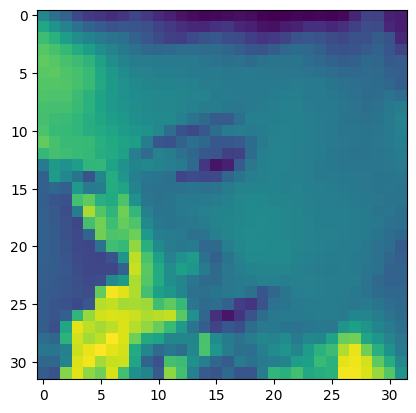

In [84]:
plt.imshow(X_train3[0])

In [85]:
X_train2.shape

(436, 32, 32)

In [86]:
from sklearn.utils import shuffle

In [87]:
X = np.vstack((X_train1, X_train2, X_train3, X_train4, X_train5, X_train6,X_train7))

In [88]:
df_train['numero_categoria'] = df_train['category'].map(class_names_label)

In [89]:
y = df_train['numero_categoria']

In [90]:
X, y = shuffle(X, y, random_state=42)

In [91]:
y.value_counts()

numero_categoria
3    7164
4    4982
5    4938
2    4103
0    3993
6    3205
1     436
Name: count, dtype: int64

In [92]:
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator

In [93]:
# Conteo de la frecuencia de cada categoría en el conjunto de entrenamiento
conteo_categorias = pd.Series(y.value_counts())

# Encontrar la categoría con más frecuencia
categoria_mas_frecuente = conteo_categorias.idxmax()

# Obtener el número máximo de muestras para una categoría
max_muestras = conteo_categorias.max()

X_reshaped = X.reshape(X.shape[0], -1)

sampler = RandomOverSampler(sampling_strategy={categoria: max_muestras for categoria in conteo_categorias.index})

X_resampled, y_resampled = sampler.fit_resample(X_reshaped, y)

In [94]:
y_resampled.value_counts()

numero_categoria
5    7164
3    7164
2    7164
4    7164
0    7164
6    7164
1    7164
Name: count, dtype: int64

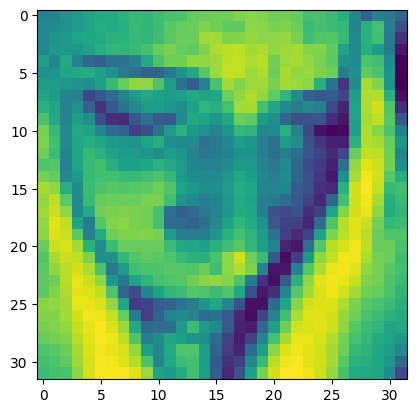

In [95]:
plt.imshow(X[1]);

In [96]:
print("Min:", np.min(X_resampled))
print("Max:", np.max(X_resampled))

Min: 0
Max: 255


In [97]:
X_resampled = X_resampled / 255.0

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                   y_resampled,
                                                   test_size = 0.15,
                                                   random_state=0)

In [99]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

In [100]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=5)

In [101]:
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.h5")

In [103]:
X_train = X_train.reshape((-1, 32, 32, 1))
X_test = X_test.reshape((-1, 32, 32, 1))

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


num_classes = y_train_categorical.shape[1]


model = keras.Sequential([
    
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),


    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
   
    keras.layers.Dense(64, activation='relu'),
    
    keras.layers.Dense(32, activation='relu'),

    keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=30,
    batch_size=BATCH_SIZE,
    callbacks=[earlystop, mcheckpoint],
    validation_data=(X_test, y_test_categorical),
    validation_split=0.2
)

Epoch 1/30
889/889 [==============================] - 43s 43ms/step - loss: 1.7913 - accuracy: 0.2747 - val_loss: 1.5509 - val_accuracy: 0.4068
Epoch 2/30
  3/889 [..............................] - ETA: 33s - loss: 1.5688 - accuracy: 0.3472

c:\Users\Manolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


889/889 [==============================] - 39s 44ms/step - loss: 1.4760 - accuracy: 0.4347 - val_loss: 1.3033 - val_accuracy: 0.5046
Epoch 3/30
889/889 [==============================] - 37s 42ms/step - loss: 1.2944 - accuracy: 0.5021 - val_loss: 1.1735 - val_accuracy: 0.5512
Epoch 4/30
889/889 [==============================] - 39s 44ms/step - loss: 1.1937 - accuracy: 0.5395 - val_loss: 1.1087 - val_accuracy: 0.5722
Epoch 5/30
889/889 [==============================] - 39s 44ms/step - loss: 1.1325 - accuracy: 0.5660 - val_loss: 1.0315 - val_accuracy: 0.6031
Epoch 6/30
889/889 [==============================] - 38s 42ms/step - loss: 1.0917 - accuracy: 0.5813 - val_loss: 1.0078 - val_accuracy: 0.6160
Epoch 7/30
889/889 [==============================] - 37s 41ms/step - loss: 1.0472 - accuracy: 0.5982 - val_loss: 0.9891 - val_accuracy: 0.6279
Epoch 8/30
889/889 [==============================] - 34s 39ms/step - loss: 1.0106 - accuracy: 0.6129 - val_loss: 0.9608 - val_accuracy: 0.6313
Epo

In [44]:
results = model.evaluate(X_test, y_test_categorical)

236/236 [==============================] - 9s 29ms/step - loss: 0.7297 - accuracy: 0.7964


In [45]:
TEST_PATH = ROOT_PATH + "\\..\\data\\images\\test\\"

In [46]:
def read_data(path, im_size):
    X = {'nombre':[],'imagen':[]}


    ##### CODE #####
    # Iterar sobre todo lo que haya en path

    for file in os.listdir(path):
        print(file)
 
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + file,cv2.COLOR_GRAY2BGR)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        
        X['imagen'].append(smallimage)
        X['nombre'].append(file)


    return pd.DataFrame(X)
    

test = read_data(TEST_PATH, IMAGE_WIDTH)

10004.jpg
10019.jpg
10023.jpg
10029.jpg
1003.jpg
10031.jpg
10033.jpg
10043.jpg
10044.jpg
10048.jpg
10052.jpg
10053.jpg
10056.jpg
10065.jpg
10068.jpg
10073.jpg
10074.jpg
10079.jpg
1008.jpg
10095.jpg
10096.jpg
10097.jpg
10099.jpg
101.jpg
10106.jpg
10114.jpg
10116.jpg
10117.jpg
10118.jpg
10121.jpg
10126.jpg
10134.jpg
10138.jpg
10141.jpg
10148.jpg
10150.jpg
10162.jpg
10163.jpg
10171.jpg
10172.jpg
10176.jpg
10185.jpg
10189.jpg
1020.jpg
10215.jpg
10218.jpg
1022.jpg
10237.jpg
1024.jpg
10246.jpg
10247.jpg
10248.jpg
10252.jpg
10257.jpg
10259.jpg
1026.jpg
10263.jpg
10266.jpg
10267.jpg
10268.jpg
1027.jpg
10273.jpg
10276.jpg
10278.jpg
10286.jpg
10292.jpg
10306.jpg
10312.jpg
10315.jpg
10317.jpg
1033.jpg
10336.jpg
10338.jpg
10339.jpg
10344.jpg
10346.jpg
10352.jpg
10355.jpg
10362.jpg
10365.jpg
10367.jpg
10370.jpg
10371.jpg
10372.jpg
10375.jpg
10382.jpg
10383.jpg
10386.jpg
10399.jpg
10406.jpg
10409.jpg
10415.jpg
10423.jpg
10425.jpg
10426.jpg
10432.jpg
10435.jpg
10437.jpg
10443.jpg
10444.jpg
10445.jpg


In [47]:
test['id_img'] = test['nombre'].apply(lambda x: os.path.splitext(x)[0])

In [48]:
sample = pd.read_csv('sample_submision.csv')

In [49]:
test['id_img'] = test['id_img'].astype('int64')

In [50]:
df_test = pd.merge(sample, test, how='left', left_on='id_img', right_on='id_img')

In [51]:
test_final = df_test['imagen'].values.tolist()

In [52]:
lista_imagenes = []
for imagen in df_test['imagen']:
    lista_imagenes.append(list(imagen))

In [53]:
test_final = np.array(lista_imagenes)

In [54]:
print("Min:", np.min(test_final))
print("Max:", np.max(test_final))

Min: 0
Max: 255


In [55]:
test_final = test_final / 255

In [56]:
print("Min:", np.min(test_final))
print("Max:", np.max(test_final))

Min: 0.0
Max: 1.0


In [57]:
predictions = model.predict(test_final)
predictions

221/221 [==============================] - 9s 28ms/step


array([[8.4518081e-01, 2.6869879e-08, 2.3484901e-02, ..., 3.0391080e-02,
        2.2283867e-02, 3.1379714e-05],
       [9.2971218e-01, 1.2353502e-08, 2.4474960e-02, ..., 2.2561054e-04,
        2.6662003e-03, 3.1885177e-02],
       [9.9027902e-01, 1.9066344e-10, 2.1024698e-03, ..., 5.3274276e-04,
        6.7705167e-03, 1.2315711e-08],
       ...,
       [3.5133597e-02, 8.4398110e-08, 1.2019374e-03, ..., 1.7170226e-03,
        5.2699534e-04, 9.6079832e-01],
       [1.8949563e-03, 4.3153250e-10, 2.2798264e-05, ..., 1.4702910e-04,
        8.4142581e-02, 5.3904984e-07],
       [3.2539815e-02, 3.0290628e-06, 8.8259035e-01, ..., 9.3049166e-04,
        1.5024123e-03, 2.8605614e-02]], dtype=float32)

In [58]:
etiquetas_prediccion = np.argmax(predictions, axis=1)
etiquetas_prediccion

array([0, 0, 0, ..., 6, 3, 2], dtype=int64)

In [59]:
submision_2 = pd.DataFrame(etiquetas_prediccion)


In [60]:
submision_2.columns = ['categoria']

In [61]:
submision_2

,categoria
0,0
1,0
2,0
3,0
4,4
...,...
7061,6
7062,6
7063,6
7064,3


In [62]:
etiquetas = {0 : 'angry', 1 : 'disgust', 2 :'fear',3 : 'happy', 4 : 'neutral',5 : 'sad',6 : 'surprise' }

In [63]:
submision_2['label'] = submision_2['categoria'].map(etiquetas)

In [64]:
submision = pd.read_csv('test_set.csv')

In [65]:
submision_2.drop(['categoria'],axis=1, inplace=True)

In [66]:
submision['label'] = submision_2['label']

In [67]:
submision.head(20)

,id_img,label
0,10052,angry
1,10065,angry
2,10079,angry
3,10095,angry
4,10121,neutral
5,10148,angry
6,10163,angry
7,10215,sad
8,1024,angry
9,10286,angry


In [68]:
submision.to_csv('submision.csv',index=False)

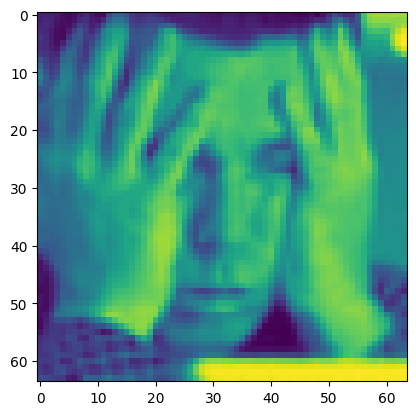

In [69]:
plt.imshow(test_final[1]);

In [70]:
test.shape

(7066, 3)

In [71]:
submision

,id_img,label
0,10052,angry
1,10065,angry
2,10079,angry
3,10095,angry
4,10121,neutral
...,...,...
7061,9806,surprise
7062,9830,surprise
7063,9853,surprise
7064,9878,happy


In [72]:
test

,nombre,imagen,id_img
0,10004.jpg,"[[1, 1, 1, 1, 2, 5, 10, 15, 16, 11, 10, 11, 13...",10004
1,10019.jpg,"[[159, 158, 157, 159, 165, 168, 170, 170, 172,...",10019
2,10023.jpg,"[[195, 197, 196, 193, 190, 159, 114, 68, 56, 7...",10023
3,10029.jpg,"[[41, 45, 51, 58, 65, 67, 67, 68, 74, 81, 88, ...",10029
4,1003.jpg,"[[44, 37, 28, 21, 23, 27, 29, 29, 33, 36, 38, ...",1003
...,...,...,...
7061,9977.jpg,"[[178, 153, 135, 130, 131, 148, 170, 187, 183,...",9977
7062,9979.jpg,"[[243, 243, 241, 233, 201, 189, 181, 175, 169,...",9979
7063,9982.jpg,"[[203, 219, 231, 234, 237, 235, 233, 233, 237,...",9982
7064,9984.jpg,"[[57, 56, 56, 58, 62, 62, 59, 56, 58, 58, 59, ...",9984
